In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('https://blent-keskia.s3.eu-west-3.amazonaws.com/poc/cantine/data-meteo.csv')
data

,Index,Date,Secteur,Commentaire semaine,Commentaire jour,Code_entrée,Entrée,Code_plat,Plat,Code_légumes,...,Gouter,Code_gouter_02,Gouter_02,Taux participation,Température,Humidité,Vitesse du vent moyen 10 mn,Taux gaspillage,Attente moyenne,Allergies
0,0,2016-03-21,3.0,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,...,Pain/ confiture d'abricots/ lait,NaN,NaN,0.93,10.7,58,4.5,0.04,38.346453,0.00
1,1,2016-03-21,1.0,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,...,Pain/ confiture d'abricots/ lait,NaN,NaN,0.95,10.7,58,4.5,0.04,0.000000,0.02
2,2,2016-03-21,2.0,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,...,Pain/ confiture d'abricots/ lait,NaN,NaN,0.89,10.7,58,4.5,0.04,13.527442,0.02
3,3,2016-03-22,3.0,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,...,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN,0.93,11.2,50,4.3,0.35,17.617790,0.02
4,4,2016-03-22,1.0,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,...,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN,0.92,11.2,50,4.3,0.40,14.935822,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,5132,2023-01-20,1.0,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,...,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme,0.90,3.3,86,0.5,0.04,6.870966,0.02
5133,5133,2023-01-20,3.0,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,...,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme,0.93,3.3,86,0.5,0.04,5.905211,0.00
5134,5134,2023-01-23,1.0,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Sauté de porc sauce charcutière OU Rôti de din...,NaN,...,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée,0.93,3.8,76,3.6,0.04,0.000000,0.00
5135,5135,2023-01-23,3.0,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Rôti de porc OU Rôti de dinde OU Galette texas*,NaN,...,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée,0.92,3.8,76,3.6,0.04,37.807232,0.02


In [ ]:
data.describe()

,Index,Secteur,Taux participation,Température,Humidité,Vitesse du vent moyen 10 mn,Taux gaspillage,Attente moyenne,Allergies
count,5137.000000,5133.000000,5137.000000,5137.000000,5137.000000,5131.000000,5137.000000,5137.000000,5137.000000
mean,2568.000000,1.981297,0.775383,13.942749,74.809811,4.031319,0.145519,7.441719,0.009652
std,1483.068497,0.819697,0.267541,5.306684,13.997741,2.163247,0.122804,10.647673,0.009995
min,0.000000,1.000000,0.000000,-2.800000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,1284.000000,1.000000,0.570000,10.500000,65.000000,2.400000,0.040000,0.000000,0.000000
50%,2568.000000,2.000000,0.910000,13.600000,75.000000,3.800000,0.110000,0.619857,0.000000
75%,3852.000000,3.000000,0.930000,17.800000,85.000000,5.300000,0.220000,12.522374,0.020000
max,5136.000000,3.000000,1.000000,33.900000,100.000000,13.300000,0.690000,68.840744,0.020000


In [ ]:
# afficher la somme des valeurs manquantes par colonnes
data.isnull().sum().sort_values(ascending = False)

Code_gouter_02                 4867
Code_laitage                   4594
Commentaire semaine            4547
Gouter_02                      4537
Commentaire jour               4384
Code_légumes                   4046
Code_dessert                   3798
Code_gouter                    3778
Code_entrée                    3154
Code_plat                      2543
Laitage                        1528
Dessert                        1101
Légumes                         623
Plat                            223
Gouter                          167
Entrée                          141
Vitesse du vent moyen 10 mn       6
Secteur                           4
Attente moyenne                   0
Humidité                          0
Taux gaspillage                   0
Index                             0
Température                       0
Taux participation                0
Date                              0
Allergies                         0
dtype: int64

In [ ]:
# voir les types
data.dtypes

Index                            int64
Date                            object
Secteur                        float64
Commentaire semaine             object
Commentaire jour                object
Code_entrée                     object
Entrée                          object
Code_plat                       object
Plat                            object
Code_légumes                    object
Légumes                         object
Code_laitage                    object
Laitage                         object
Code_dessert                    object
Dessert                         object
Code_gouter                     object
Gouter                          object
Code_gouter_02                  object
Gouter_02                       object
Taux participation             float64
Température                    float64
Humidité                         int64
Vitesse du vent moyen 10 mn    float64
Taux gaspillage                float64
Attente moyenne                float64
Allergies                

In [ ]:
# Separation des variables numeriques et categoriques
data_cat = []
data_num = []
for i,t in enumerate(data.dtypes):
  if t == object :
    data_cat.append(data.iloc[:,i])
  else:
    data_num.append(data.iloc[:,i])

data_cat = pd.DataFrame(data_cat).transpose()
data_num = pd.DataFrame(data_num).transpose()

In [ ]:
data_cat

,Date,Commentaire semaine,Commentaire jour,Code_entrée,Entrée,Code_plat,Plat,Code_légumes,Légumes,Code_laitage,Laitage,Code_dessert,Dessert,Code_gouter,Gouter,Code_gouter_02,Gouter_02
0,2016-03-21,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,Lentilles,NaN,Crme au chocolat,NaN,NaN,NaN,Pain/ confiture d'abricots/ lait,NaN,NaN
1,2016-03-21,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,Lentilles,NaN,Crme au chocolat,NaN,NaN,NaN,Pain/ confiture d'abricots/ lait,NaN,NaN
2,2016-03-21,NaN,NaN,FLS,Pamplemousse,VPF,Rôti de porc au jus,NaN,Lentilles,NaN,Crme au chocolat,NaN,NaN,NaN,Pain/ confiture d'abricots/ lait,NaN,NaN
3,2016-03-22,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,Frites,NaN,Saint Paulin,NaN,Compote pommes/ fraises,NaN,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN
4,2016-03-22,NaN,NaN,AB,"Salade floride (carotte râpée, dé d'orange)",NaN,Poulet rôti,NaN,Frites,NaN,Saint Paulin,NaN,Compote pommes/ fraises,NaN,Pain/ beurre/ barre chocolatée/ lait,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2023-01-20,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,Pommes de terre vapeur,NaN,Fromage,BIO,Fruit de saison,BIO,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme
5133,2023-01-20,NaN,NaN,BIO,Crème de carottes,DUR,Filet de saumon à l'oseille,NaN,Pommes de terre vapeur,NaN,Fromage,BIO,Fruit de saison,BIO,Pain / beurre\nCorbeille de fruits \nLait ou f...,BIO,Pain au lait\nPomme
5134,2023-01-23,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Sauté de porc sauce charcutière OU Rôti de din...,NaN,Haricots blancs,NaN,Fromage,BIO,Fruit de saison,BIO,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée
5135,2023-01-23,NaN,NaN,BIO,Betteraves au miel,FR / BIO / DUR,Rôti de porc OU Rôti de dinde OU Galette texas*,NaN,Haricots blancs,NaN,Fromage,BIO,Fruit de saison,BIO,Brioche\nBarre chocolatée\nLait,NaN,Brioche\nBarre chocolatée


In [ ]:
'''from sklearn.preprocessing import OneHotEncoder
# Créer un objet OneHotEncoder avec sparse=False pour obtenir un tableau numpy
encoder = OneHotEncoder(sparse=False)

# Encoder la colonne sexe en utilisant la méthode fit_transform
my_encoded = encoder.fit_transform(data_cat)

'''
#remplacer les valeurs categoriques par 0,1,2,...
lab_enc = LabelEncoder()
for i in data_cat:
  data_cat[i] = lab_enc.fit_transform(data_cat[i])
data_cat

,Date,Commentaire semaine,Commentaire jour,Code_entrée,Entrée,Code_plat,Plat,Code_légumes,Légumes,Code_laitage,Laitage,Code_dessert,Dessert,Code_gouter,Gouter,Code_gouter_02,Gouter_02
0,0,13,74,17,291,82,693,16,168,14,12,12,270,11,459,1,86
1,0,13,74,17,291,82,693,16,168,14,12,12,270,11,459,1,86
2,0,13,74,17,291,82,693,16,168,14,12,12,270,11,459,1,86
3,1,13,74,0,568,94,546,16,99,14,98,12,89,11,407,1,86
4,1,13,74,0,568,94,546,16,99,14,98,12,89,11,407,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,1746,13,74,13,211,29,330,16,215,14,48,5,175,2,264,0,61
5133,1746,13,74,13,211,29,330,16,215,14,48,5,175,2,264,0,61
5134,1747,13,74,13,24,45,911,16,143,14,48,5,175,2,29,1,13
5135,1747,13,74,13,24,45,660,16,143,14,48,5,175,2,29,1,13


In [ ]:
# afficher la somme des valeurs manquantes par colonnes
data_cat.isnull().sum().sort_values(ascending = False)

Date                   0
Code_laitage           0
Code_gouter_02         0
Gouter                 0
Code_gouter            0
Dessert                0
Code_dessert           0
Laitage                0
Légumes                0
Commentaire semaine    0
Code_légumes           0
Plat                   0
Code_plat              0
Entrée                 0
Code_entrée            0
Commentaire jour       0
Gouter_02              0
dtype: int64

In [ ]:
# Pour les variables numeriques, remplaces les valeurs manquantes par la valeurs precedentes
data_num.fillna(value=data_num.mean(), inplace=True)

In [ ]:
data_num.isnull().sum().sort_values(ascending = False)

Index                          0
Secteur                        0
Taux participation             0
Température                    0
Humidité                       0
Vitesse du vent moyen 10 mn    0
Taux gaspillage                0
Attente moyenne                0
Allergies                      0
dtype: int64

In [ ]:
# Suppression de la colonne Loan_ID
data_num.drop('Taux gaspillage', axis=1, inplace=True)
data_num

,Index,Secteur,Taux participation,Température,Humidité,Vitesse du vent moyen 10 mn,Attente moyenne,Allergies
0,0.0,3.0,0.93,10.7,58.0,4.5,38.346453,0.00
1,1.0,1.0,0.95,10.7,58.0,4.5,0.000000,0.02
2,2.0,2.0,0.89,10.7,58.0,4.5,13.527442,0.02
3,3.0,3.0,0.93,11.2,50.0,4.3,17.617790,0.02
4,4.0,1.0,0.92,11.2,50.0,4.3,14.935822,0.00
...,...,...,...,...,...,...,...,...
5132,5132.0,1.0,0.90,3.3,86.0,0.5,6.870966,0.02
5133,5133.0,3.0,0.93,3.3,86.0,0.5,5.905211,0.00
5134,5134.0,1.0,0.93,3.8,76.0,3.6,0.000000,0.00
5135,5135.0,3.0,0.92,3.8,76.0,3.6,37.807232,0.02


In [ ]:
data_cat = pd.DataFrame(data_cat)

In [ ]:
target=data_num['Taux participation']
data_num.drop('Taux participation', axis=1, inplace=True)

In [ ]:
X = pd.concat([data_cat, data_num], axis=1)
Y = target

In [ ]:
X.isnull().sum().sort_values()

Date                           0
Vitesse du vent moyen 10 mn    0
Humidité                       0
Température                    0
Secteur                        0
Index                          0
Gouter_02                      0
Code_gouter_02                 0
Gouter                         0
Code_gouter                    0
Dessert                        0
Code_dessert                   0
Laitage                        0
Code_laitage                   0
Légumes                        0
Code_légumes                   0
Plat                           0
Code_plat                      0
Entrée                         0
Code_entrée                    0
Commentaire jour               0
Commentaire semaine            0
Attente moyenne                0
Allergies                      0
dtype: int64

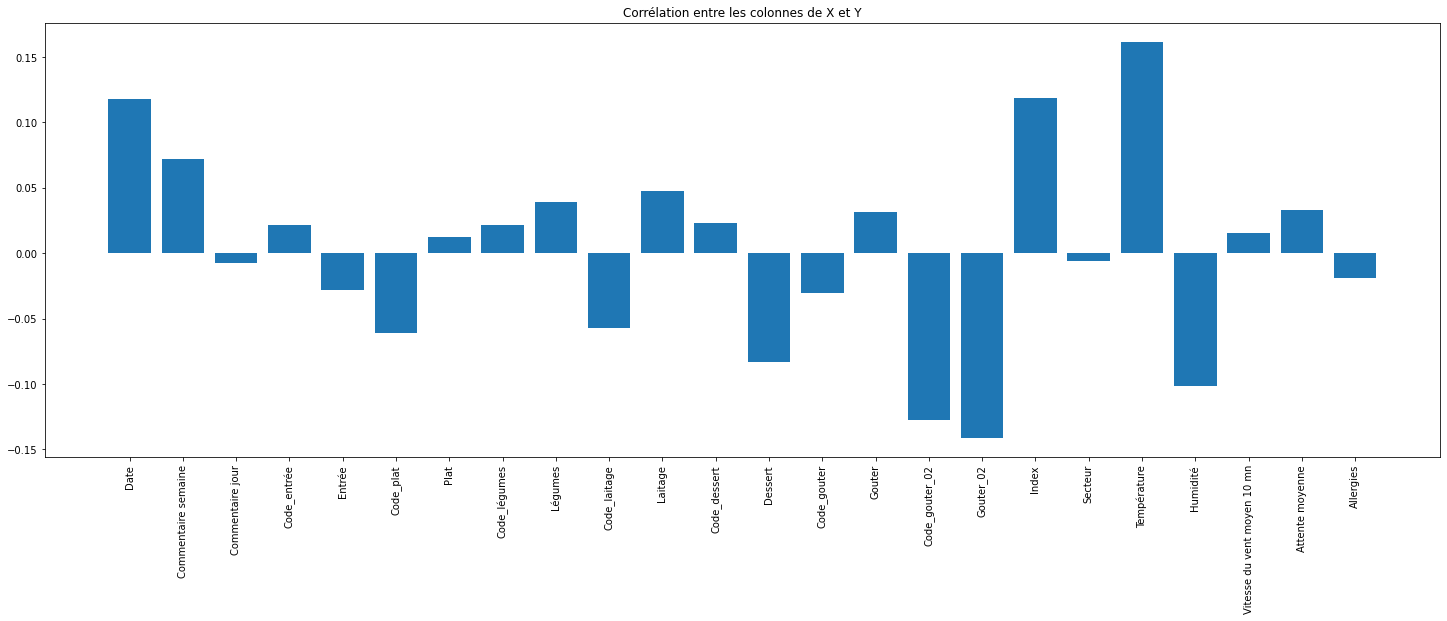

In [ ]:
# Calculer la corrélation entre chaque colonne de X et Y
corr = X.corrwith(Y)

# Création d'une figure de taille 25x8 pouces
fig = plt.figure(figsize=(25, 8))
# Afficher la corrélation dans un histogramme
plt.bar(corr.index, corr.values)
plt.title('Corrélation entre les colonnes de X et Y')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Supprimer les colonnes du dataframe X en utilisant la méthode drop
# X.drop(["Code_légumes","Vitesse du vent moyen 10 mn","Humidité","Attente moyenne","Secteur"], axis=1, inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
print('La taille de X_train est:', X_train.shape)
print('La taille de X_test est:', X_test.shape)
print('La taille de Y_train est:', Y_train.shape)
print('La taille de Y_test est:', Y_test.shape)

La taille de X_train est: (3852, 24)
La taille de X_test est: (1285, 24)
La taille de Y_train est: (3852,)
La taille de Y_test est: (1285,)


In [ ]:
# Définir une fonction qui prend en entrée les données X_train,Y_train,X_test,Y_test
def compare_regression_models(X_train,Y_train,X_test,Y_test):
  # Créer une liste des noms des algorithmes de régression
  names = ['LinearReg', 'RidgeReg', 'LassoReg', 'DecisionTreeReg', 'SVM Reg', 'KNN Reg', 'Random Forest Reg', 'Gradient Boosting Reg', 'XGB Reg', 'Ada Boost Reg', 'ElasticNet', 'ExtraTreesReg']

  # Créer une liste des objets des algorithmes de régression
  models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), AdaBoostRegressor(), ElasticNet(), ExtraTreesRegressor()]

  # Créer une liste vide pour stocker les scores des modèles
  scores = []

  # Parcourir la liste des modèles
  for model in models:
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, Y_train)

    # Prédire les valeurs pour les données de test
    Y_pred = model.predict(X_test)

    # Calculer le score R-carré du modèle et le convertir en pourcentage
    score = model.score(X_test, Y_test) * 100

    # Ajouter le score à la liste des scores
    scores.append(score)

  # Création d'une figure de taille 18x8 pouces
  fig = plt.figure(figsize=(18, 8))
  # Afficher les scores dans un histogramme
  plt.bar(names, scores)
  plt.title('Comparaison des algorithmes de régression')
  plt.xlabel('Algorithme')
  plt.ylabel('Score R-carré (%)')
  plt.xticks(rotation=90)

  # Parcourir la liste des scores et afficher chaque score au-dessus de la barre correspondante
  for i in range(len(scores)):
    plt.text(x=i-0.3, y=scores[i]+1, s=f"{scores[i]:.2f}%", fontsize=10)

  plt.show()

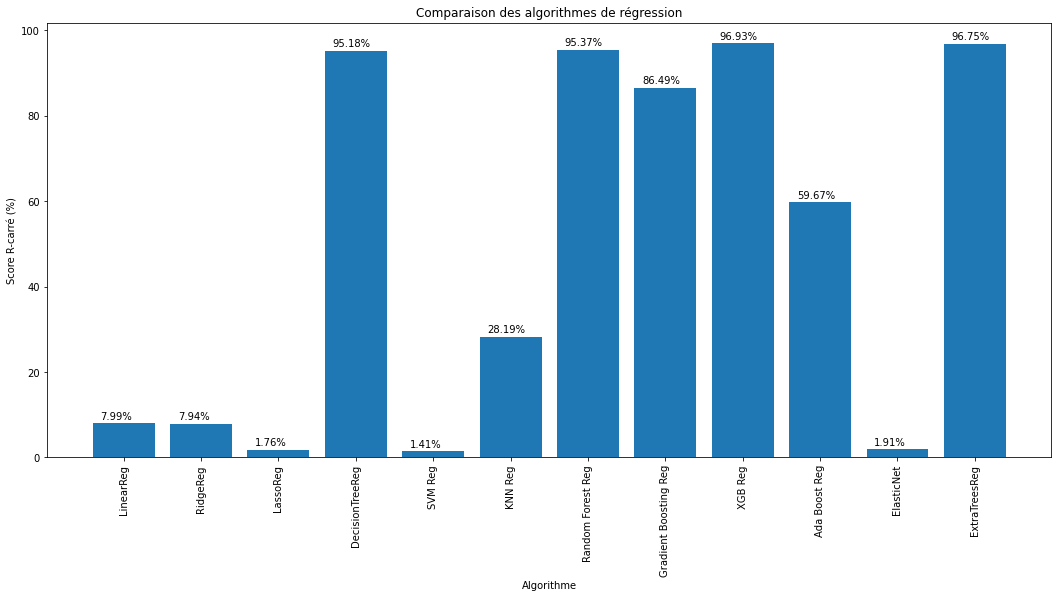

In [ ]:
compare_regression_models(X_train,Y_train,X_test,Y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define a function that takes in the data X_train,Y_train,X_test,Y_test
def compare_regression_models1(X_train,Y_train,X_test,Y_test):
    # Create a list of the names of the regression algorithms
    names = ['LinearReg', 'RidgeReg', 'LassoReg', 'DecisionTreeReg', 'SVM Reg', 'KNN Reg', 'Random Forest Reg', 'Gradient Boosting Reg', 'XGB Reg', 'Ada Boost Reg', 'ElasticNet', 'ExtraTreesReg']

    # Create a list of the objects of the regression algorithms
    models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), AdaBoostRegressor(), ElasticNet(), ExtraTreesRegressor()]

    # Create a list of parameter grids for each model
    param_grids = [
        {},  # Linear Regression has no hyperparameters to tune
        {'alpha': np.logspace(-3, 2, 10)},  # Ridge Regression
        {'alpha': np.logspace(-3, 2, 10)},  # Lasso Regression
        {'max_depth': range(1,11), 'min_samples_split': range(2,12)},  # Decision Tree Regressor
        {'C': np.logspace(-3, 2, 10), 'gamma': np.logspace(-3, 2, 10)},  # Support Vector Regressor
        {'n_neighbors': range(1,11)},  # K-Nearest Neighbors Regressor
        {'n_estimators': [10,50,100,150,200], 'max_depth': range(1,6)},  # Random Forest Regressor
        {'n_estimators': [10,50,100], 'learning_rate': np.logspace(-3,-1,10)},  # Gradient Boosting Regressor
        {'n_estimators': [10,50], 'learning_rate': np.logspace(-3,-1,10)},  # XGBoost Regressor
        {'n_estimators': [10], 'learning_rate': np.logspace(-3,-1,10)},   # AdaBoost Regressor
        {'alpha': np.logspace(-3,-1,10), 'l1_ratio': np.linspace(0.1,0.9,10)},   # ElasticNet
        {'n_estimators': [10],'max_depth':[1]}   # ExtraTreesRegressor
    ]

    # Create an empty list to store the scores of the models
    scores = []

    # Loop through the list of models and their corresponding parameter grids
    for model,param_grid in zip(models,param_grids):
        # Perform hyperparameter optimization using GridSearchCV
        grid_search = GridSearchCV(model,param_grid,cv=5)
        grid_search.fit(X_train,Y_train)

        # Get the best model and its score
        best_model = grid_search.best_estimator_
        score = grid_search.best_score_ *100

        # Add the score to the list of scores
        scores.append(score)

        print(f"{best_model} R-squared score: {score:.2f}%")

    # Create a figure of size 18x8 inches
    fig = plt.figure(figsize=(18,8))
    # Display the scores in a bar chart
    plt.bar(names,scores)
    plt.title('Comparison of regression algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel('R-squared Score (%)')
    plt.xticks(rotation=90)

    # Loop through the list of scores and display each score above its corresponding bar
    for i in range(len(scores)):
      plt.text(x=i-0.3,y=scores[i]+1,s=f"{scores[i]:.2f}%",fontsize=10)

    plt.show()

LinearRegression() R-squared score: 8.49%
Ridge(alpha=7.742636826811277) R-squared score: 8.59%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+02, tolerance: 2.279e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.856e+01, tolerance: 2.221e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+02, tolerance: 2.232e-02

Lasso(alpha=0.001) R-squared score: 8.12%
DecisionTreeRegressor(max_depth=10, min_samples_split=3) R-squared score: 87.65%
SVR(C=2.1544346900318843, gamma=0.001) R-squared score: 60.02%
KNeighborsRegressor(n_neighbors=1) R-squared score: 64.03%
RandomForestRegressor(max_depth=5, n_estimators=200) R-squared score: 83.02%
GradientBoostingRegressor() R-squared score: 87.52%
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
       

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+02, tolerance: 2.279e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.955e+01, tolerance: 2.221e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+02, tolerance: 2.232e-02

ElasticNet(alpha=0.001, l1_ratio=0.5444444444444445) R-squared score: 8.13%
ExtraTreesRegressor(max_depth=1, n_estimators=10) R-squared score: 8.15%


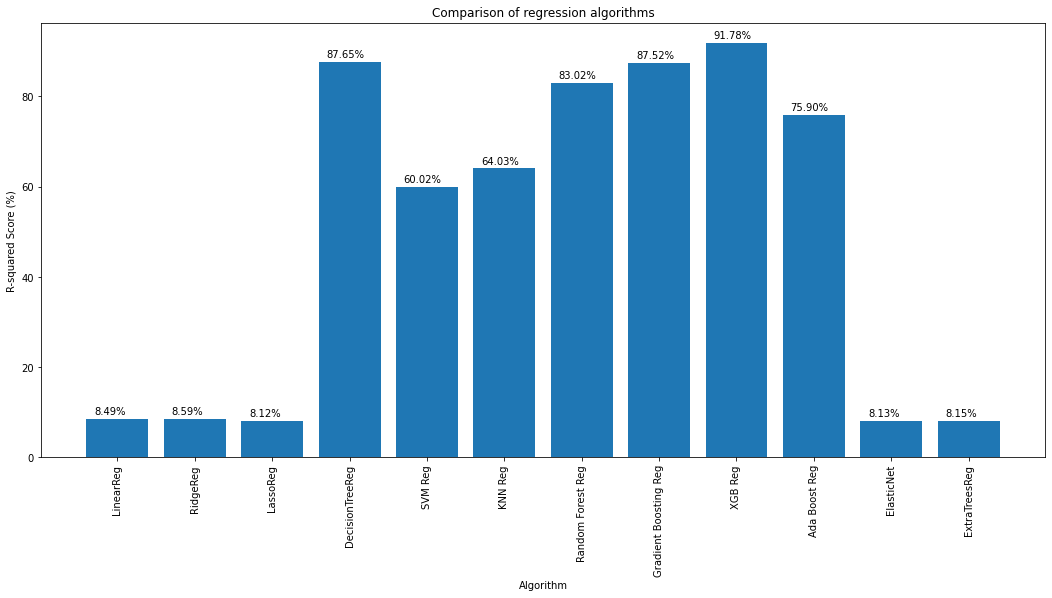

In [ ]:
compare_regression_models1(X_train,Y_train,X_test,Y_test)